Loading The Dataset

In [2]:
import pandas as pd
df=pd.read_csv("Maternal Health Risk Data Set.csv")

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


Importing Other Important Packages


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Summary Of The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


There are 4 Integer type columns (or variables), 2 Float type variables and 1 Object variable that is, Risk Level variable

In [6]:
df.shape

(1014, 7)

Which means there are 1014 rows (or rather records) and 7 columns present in the dataset

In [9]:
#Descriptive Summary Of the Dataset
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Checking For Missing Values In the dataset

In [10]:
df.isnull()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1009,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False
1011,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

There are 0 null values present in the dataset.

In [12]:
#Checking for Duplicate Records
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1009     True
1010     True
1011     True
1012     True
1013     True
Length: 1014, dtype: bool

In [13]:
df[df.duplicated()]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


There are 562 Duplicate Recorde present in the Dataset

In [14]:
#Removal of Duplicates
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(452, 7)

Post Removal Of duplicates, there are 452 records present in the dataset

One Hot Encoding

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
encoder=OneHotEncoder()

In [19]:
encoder.fit_transform(df[['RiskLevel']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [20]:
pd.DataFrame(encoder.fit_transform(df[['RiskLevel']]).toarray(),columns=encoder.get_feature_names_out())

,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
447,0.0,0.0,1.0
448,0.0,1.0,0.0
449,0.0,1.0,0.0
450,0.0,0.0,1.0


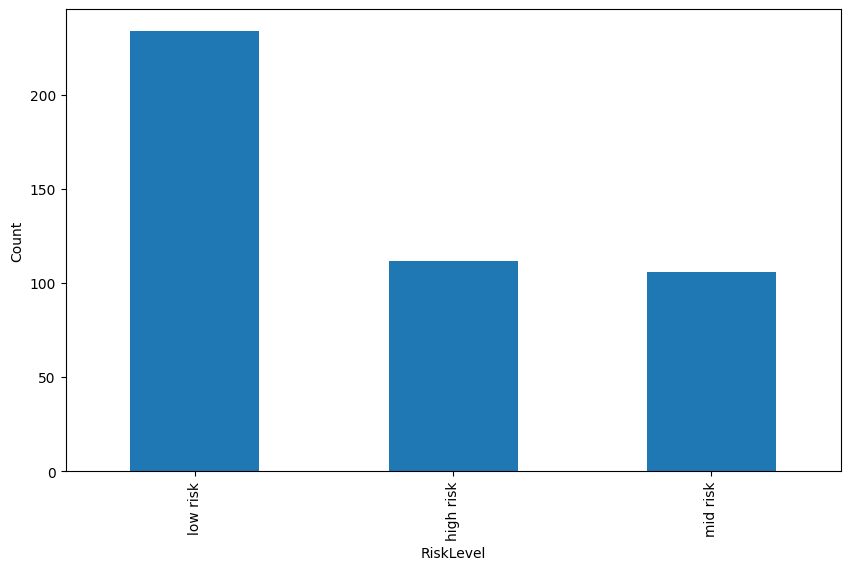

In [23]:
plt.figure(figsize=(10,6))
df.RiskLevel.value_counts().plot(kind='bar')
plt.xlabel("RiskLevel")
plt.ylabel("Count")
plt.show()

From The Above Visualization we can conclude that the Dataset is more or less, a balanced dataset.

Exploratory Data Analysis

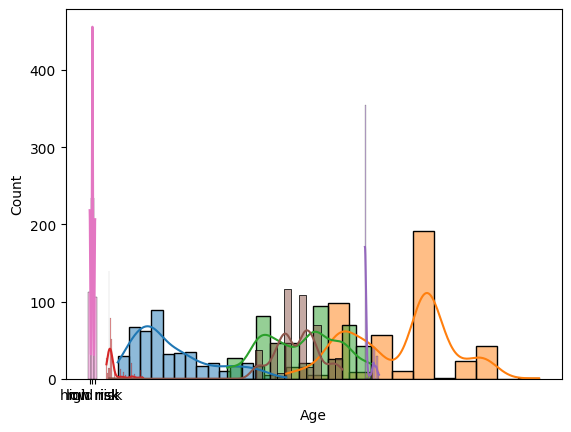

In [24]:
for column in df.columns:
    sns.histplot(df[column],kde=True)

<Axes: xlabel='SystolicBP', ylabel='Count'>

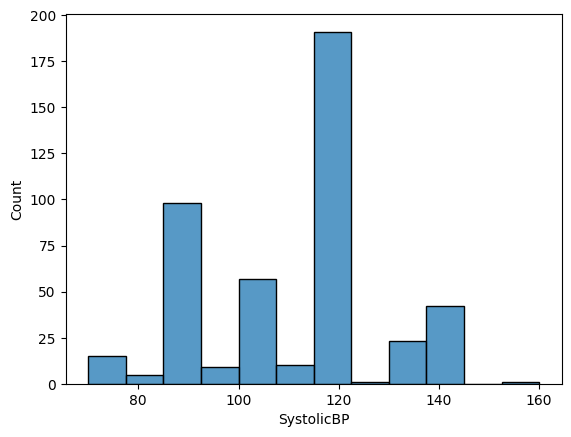

In [25]:
sns.histplot(df['SystolicBP'])

<Axes: xlabel='DiastolicBP', ylabel='Count'>

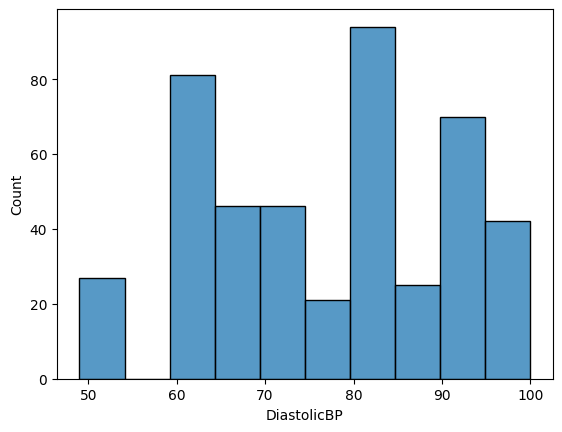

In [26]:
sns.histplot(df['DiastolicBP'])

From the Above 2 Graphs, we can see the counts of the number of persons who have Systolic Blood Pressure and Diastolic Pressure

<Axes: xlabel='Age', ylabel='SystolicBP'>

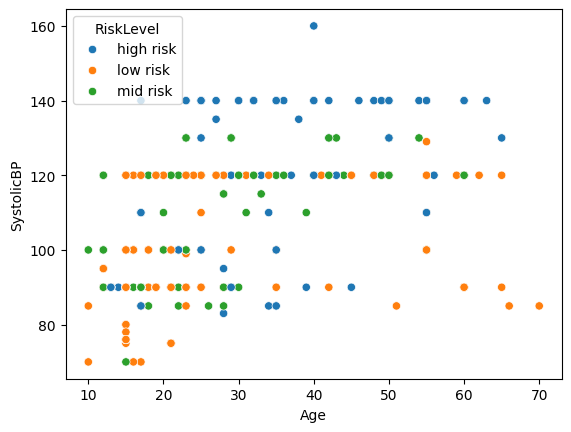

In [31]:
sns.scatterplot(x='Age',y='SystolicBP',hue='RiskLevel',data=df)

Some Observations -
1. For Age Group 10-30 - Have Low-Mid Maternal Health Risk
2. For Age Group 30-70 - have a Slight High Maternal Health Risk

<Axes: xlabel='Age', ylabel='BodyTemp'>

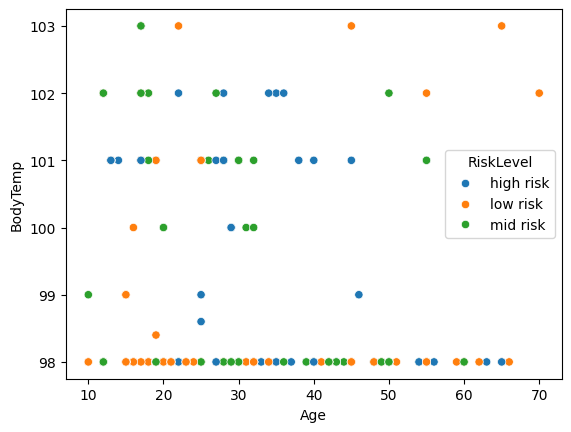

In [35]:
##categorical Plot
sns.scatterplot(x='Age',y='BodyTemp',hue='RiskLevel',data=df)